## Pandas Profiling: USA Air Pollution Data
Source of data: https://data.world/data-society/us-air-pollution-data

The autoreload instruction reloads modules automatically before code execution, which is helpful for the update below.

In [2]:
%load_ext autoreload
%autoreload 2

Make sure that we have the latest version of pandas-profiling.

In [3]:
%%capture
import sys

!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

You might want to restart the kernel now.

### Import libraries

In [4]:
import pandas as pd

from pandas_profiling.utils.cache import cache_file
from pandas_profiling import ProfileReport

### Load and prepare the dataset

In [5]:
file_name = cache_file(
    "pollution_us_2000_2016.csv",
    "https://query.data.world/s/mz5ot3l4zrgvldncfgxu34nda45kvb",
)

df = pd.read_csv(file_name, index_col=[0])

#We will only consider the data from Arizone state for this example
df = df[df['State']=='Arizona']
df['Date Local']=pd.to_datetime(df['Date Local'])

### Multi-entity time-series

The support to time series can be enabled by passing the parameter tsmode=True to the ProfileReport when its enabled, pandas profiling will try to identify time-dependent features using the feature's autocorrelation, which requires a sorted DataFrame or the definition of the `sortby` parameter.

When a feature is identified as time series will trigger the following changes:
   - the histogram will be replaced by a line plot
   - the feature details will have a new tab with autocorrelation and partial autocorrelation plots
   - two new warnings: `NON STATIONARY` and `SEASONAL` (which indicates that the series may have seasonality)

In cases where the data has multiple entities,  as in this example, where we have different meteorological stations, each station can be interpreted as a time series, its necessary to filter the entities and profile each station separately.

The following plot showcases the amount of data for each entity over time. In this case the data from the stations started being collected at the same period, and the data is collected hourly so they have the same amount of data per period.

<AxesSubplot:xlabel='Time'>

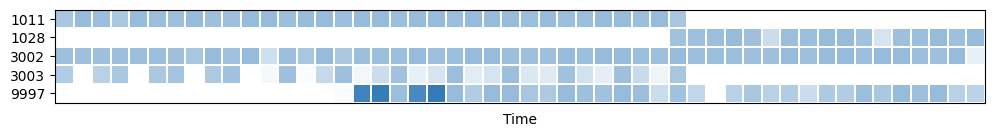

In [6]:
from pandas_profiling.visualisation.plot import timeseries_heatmap

timeseries_heatmap(dataframe=df, entity_column='Site Num', sortby='Date Local')

In [ ]:
# Return the profile per station
for group in df.groupby('Site Num'):
    #Running 1 profile per station
    profile = ProfileReport(
        group[1],
        tsmode=True,
        sortby="Date Local",
        #title=f"Air Quality profiling - Site Num: {group[0]}"
    )
    
    profile.to_file(f'Ts_Profile_{group[0]}.html')

Generating the profile for the Site num: 1011


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Generating the profile for the Site num: 1028


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]